In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
df = pd.read_csv("data.csv", header=None)
df[len(df.columns)] = 0.0
df.loc[df.iloc[:,1] == 'M', len(df.columns) - 1 ] = 1
df.drop([0, 1], axis=1, inplace=True)
df.columns = range(len(df.columns))
benin_set = df.loc[df.iloc[:,-1] == 0, 0:29]
malin_set = df.loc[df.iloc[:,-1] == 1, 0:29]

# Historgram

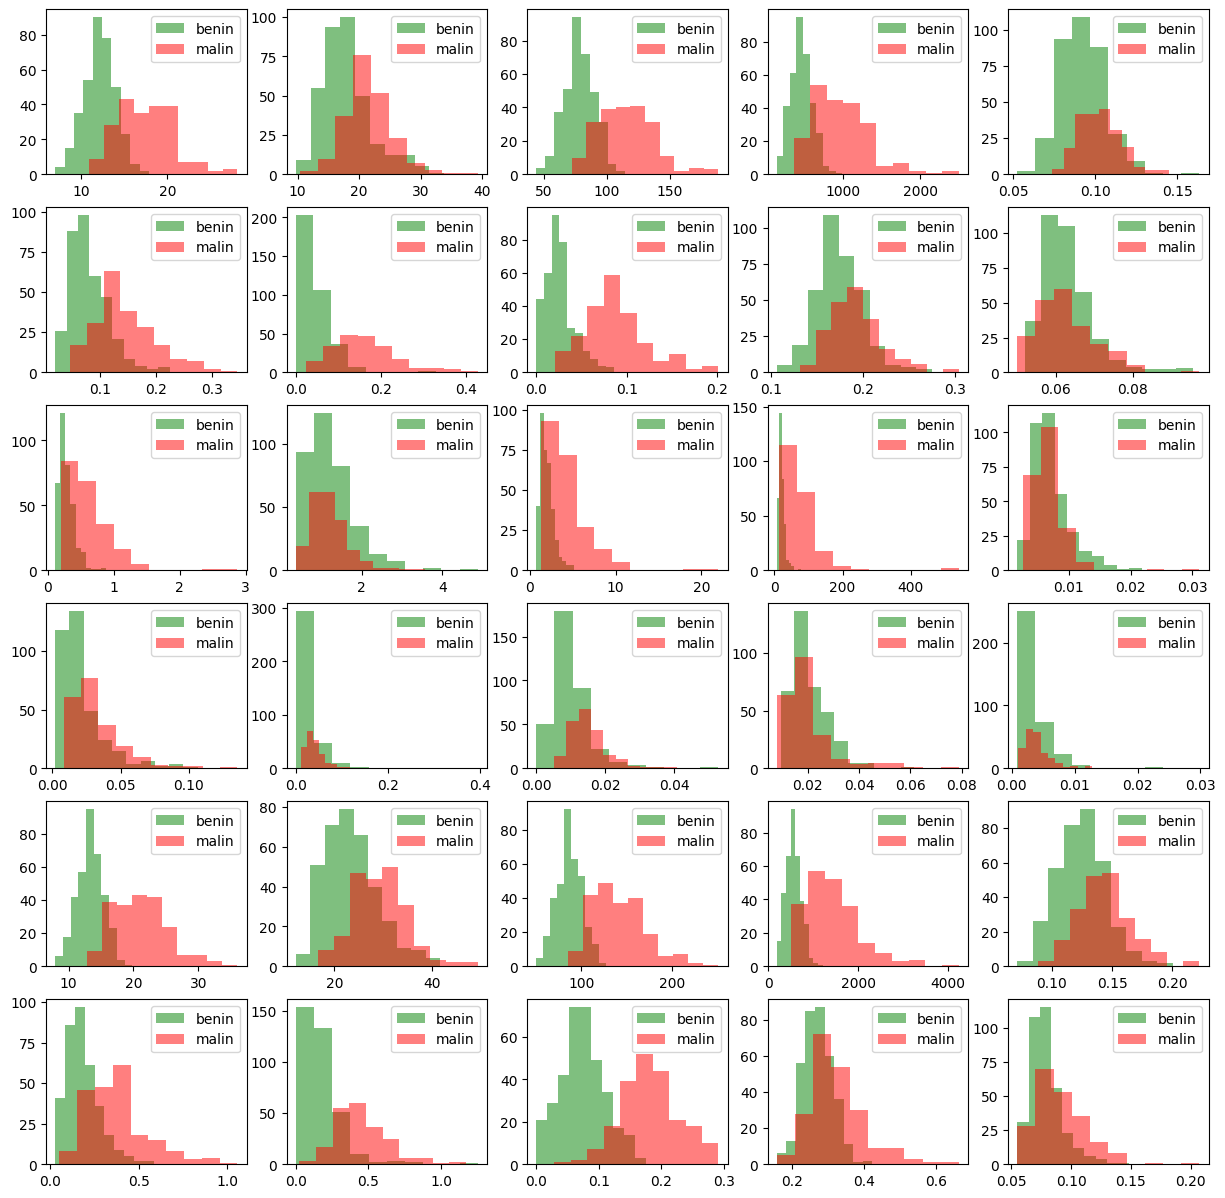

In [4]:
nb_col_graph = 5
nb_lignes_graph = 6
col_names = benin_set.columns
plt.figure(figsize=(15, 15))
for i in range(len(col_names)):
    plt.subplot(nb_lignes_graph, nb_col_graph, i + 1)
    plt.hist(benin_set.loc[:,col_names[i]], alpha = 0.5, lw=3, label="benin", color="g")
    plt.hist(malin_set.loc[:,col_names[i]], alpha = 0.5, lw=3, label="malin", color="r")
    plt.legend()
manager = plt.get_current_fig_manager()
manager.set_window_title("Histogram")
plt.show()

On remarque que les features n'ont pas toutes le meme ordre de grandeur et doivent donc etre normalisees. 

# Pair Plot

<Figure size 2000x2000 with 0 Axes>

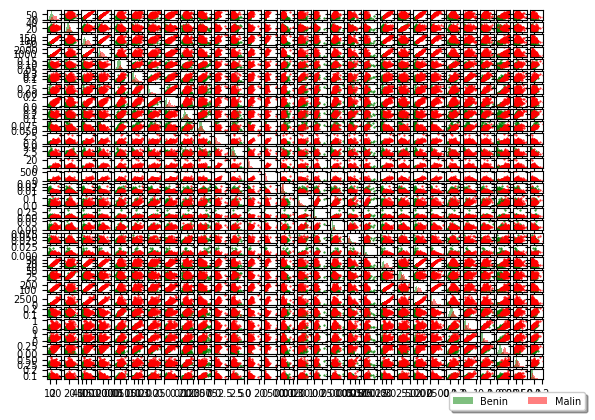

In [7]:
nb_col_graph = len(col_names)
nb_lignes_graph = len(col_names)
plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(20, 20))
fig, axs = plt.subplots(nb_lignes_graph, nb_col_graph)
for i in range(len(col_names)):
    for j in range(len(col_names)):
        if (i == j):
            axs[i, j].hist(benin_set.loc[:,col_names[i]], alpha = 0.5, lw=3, label="Benin", color="g")
            axs[i, j].hist(malin_set.loc[:,col_names[i]], alpha = 0.5, lw=3, label="Malin", color="r")
        else:
            axs[i, j].plot(benin_set.loc[:,col_names[j]], benin_set.loc[:,col_names[i]], '.',  label="Benin", color="g", markersize=1)
            axs[i, j].plot(malin_set.loc[:,col_names[j]], malin_set.loc[:,col_names[i]], '.',  label="Malin", color="r", markersize=1)
for ax in axs.flat:
    ax.label_outer()
# plt.subplots_adjust(wspace=0.2, hspace=0.2)    
plt.legend(['Benin', 'Malin'], loc='upper center', bbox_to_anchor=(-0.9, -0.8), fancybox=True, shadow=True, ncol=2)
manager = plt.get_current_fig_manager()
manager.set_window_title("Pair plot")
plt.show()

    

# Scatter

In [24]:
def showPossibilites(col_names):
    print("Possible features: ")
    for i in range(len(col_names)):
        print("     ",i + 1, "-", col_names[i])

In [26]:
def testParamsAreOk(value, col_names):
    try:
        result = int(value)
        assert result <= len(col_names)
        assert result >= 0
        return (result)
    except Exception:
        return (None)

In [27]:
testParamsAreOk(15, col_names)

15

# Normalisation

